# Load datasets

In [84]:
import pandas as pd

In [85]:
movies = pd.read_csv('movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [86]:
movies.shape


(62423, 3)

In [87]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [88]:
tags = pd.read_csv('tags.csv', sep=',')
del tags['timestamp']
tags = tags.dropna()
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [89]:
tag_counts = tags.groupby(['movieId','tag']).agg({'userId': 'count'}).round(0)
tag_counts
movie_tag = tags[['movieId','tag']]
movie_tag.drop_duplicates()

,movieId,tag
0,260,classic
1,260,sci-fi
2,1732,dark comedy
3,1732,great dialogue
4,7569,so bad it's good
...,...,...
1093352,8874,cornetto triolgy
1093353,51255,cornetto trilogy
1093357,189169,comedy
1093358,189169,disabled


In [90]:
ratings = pd.read_csv('ratings.csv', sep=',', parse_dates=['timestamp'])
del ratings['timestamp']
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [91]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
209157,1.5
209159,3.0
209163,4.5
209169,3.0
209171,3.0


In [92]:
count_rating = ratings[['movieId','rating']].groupby('movieId').count()
count_rating = count_rating.rename(columns = {'rating': 'rating_count'}, inplace = False)
count_rating.head()


,rating_count
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [93]:
stdev_rating = ratings[['movieId','rating']].groupby('movieId').std()
stdev_rating = stdev_rating.rename(columns = {'rating': 'rating_stdev'}, inplace = False)
stdev_rating.head()


,rating_stdev
movieId,
1,0.921552
2,0.959851
3,1.008443
4,1.108531
5,0.996611


In [94]:
high_ratings=ratings.groupby('movieId')['rating'].apply(lambda x: (x>= 3.5).sum()).reset_index(name='high_ratings_count')
#print (high_ratings)

In [95]:
low_ratings=ratings.groupby('movieId')['rating'].apply(lambda x: (x<= 1.5).sum()).reset_index(name='low_ratings_count')
#print (low_ratings)

# merge datasets

In [96]:
box_office = movies.merge(average_rating, on='movieId', how='inner')
box_office = box_office.merge(count_rating, on='movieId', how='inner')
box_office = box_office.merge(stdev_rating, on='movieId', how='inner')
box_office = box_office.merge(high_ratings, on='movieId', how='inner')
box_office = box_office.merge(low_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,year,rating,rating_count,rating_stdev,high_ratings_count,low_ratings_count
59042,209157,We (2018),Drama,2018,1.5,1,NaN,0,1
59043,209159,Window of the Soul (2001),Documentary,2001,3.0,1,NaN,0,0
59044,209163,Bad Poems (2018),Comedy|Drama,2018,4.5,1,NaN,1,0
59045,209169,A Girl Thing (2001),(no genres listed),2001,3.0,1,NaN,0,0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962,3.0,1,NaN,0,0


# franchises sont mieux notées que les stand-alones

In [97]:
marvel = movie_tag['tag'].str.contains('Marvel')
Marvel_movieId = movie_tag[marvel]
Marvel_movieId = Marvel_movieId.movieId.drop_duplicates()

In [98]:
dccomics = movie_tag['tag'].str.contains('DC Comics')
dccomics_movieId = movie_tag[dccomics]
dccomics_movieId = dccomics_movieId.movieId.drop_duplicates()
#dccomics_movieId

In [99]:
marvel_box_office = box_office.merge(Marvel_movieId, on='movieId', how='inner')
marvel_box_office['isMarvel']= 1
marvel_box_office.drop_duplicates()
#marvel_box_office

,movieId,title,genres,year,rating,rating_count,rating_stdev,high_ratings_count,low_ratings_count,isMarvel
0,2167,Blade (1998),Action|Horror|Thriller,1998,3.363193,13011,1.001862,7311,841,1
1,2450,Howard the Duck (1986),Adventure|Comedy|Sci-Fi,1986,2.148765,3603,1.114834,540,1328,1
2,3793,X-Men (2000),Action|Adventure|Sci-Fi,2000,3.559661,32584,0.906452,21775,1267,1
3,5254,Blade II (2002),Action|Horror|Thriller,2002,3.119546,6922,1.021183,3277,661,1
4,5349,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,2002,3.478640,30010,0.939279,19253,1513,1
5,6157,Daredevil (2003),Action|Crime,2003,2.516947,6668,1.058552,1642,1519,1
6,6333,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller,2003,3.601212,19963,0.898692,14174,797,1
7,7439,"Punisher, The (2004)",Action|Crime|Thriller,2004,3.045194,2445,1.020305,1071,247,1
8,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,2004,3.445476,20725,0.994639,13110,1314,1
9,8985,Blade: Trinity (2004),Action|Fantasy|Horror|Thriller,2004,2.936247,3443,1.066534,1336,469,1


In [100]:
dc_box_office = box_office.merge(dccomics_movieId, on='movieId', how='inner')
dc_box_office['isDC']= 1
dc_box_office.drop_duplicates()

,movieId,title,genres,year,rating,rating_count,rating_stdev,high_ratings_count,low_ratings_count,isDC
0,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,1995,2.871660,31101,0.961903,7868,3430,1
1,592,Batman (1989),Action|Crime|Thriller,1989,3.406903,44110,0.845155,21663,1254,1
2,1377,Batman Returns (1992),Action|Crime,1992,3.130438,13401,0.946123,5723,903,1
3,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,1997,2.160150,9872,1.079051,1395,3535,1
4,1599,Steel (1997),Action,1997,1.626426,526,1.046393,39,324,1
5,2640,Superman (1978),Action|Adventure|Sci-Fi,1978,3.395904,14746,0.931376,7999,617,1
6,2641,Superman II (1980),Action|Sci-Fi,1980,3.107036,8030,0.982678,3260,604,1
7,2642,Superman III (1983),Action|Adventure|Sci-Fi,1983,2.420496,4679,0.984480,738,981,1
8,2643,Superman IV: The Quest for Peace (1987),Action|Adventure|Sci-Fi,1987,2.010652,3192,1.043422,337,1299,1
9,2668,Swamp Thing (1982),Horror|Sci-Fi,1982,2.578598,1355,0.967675,241,211,1


In [101]:
marvel_box_office.rating.mean()

3.340208282233743

In [102]:
dc_box_office.rating.mean()

2.965065244284242

<AxesSubplot:>

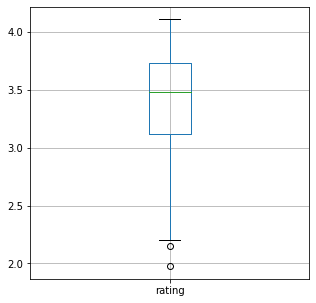

In [103]:
marvel_box_office.boxplot(column='rating', figsize=(5,5))

In [104]:
is_scifi = box_office['genres'].str.contains('Sci-Fi')
scifi_movies = box_office[is_scifi]
scifi_movies.rating.mean()
#scifi_movies.boxplot(column='rating', figsize=(5,5))

2.760530284775509

In [105]:
# create referential
is_scifi = box_office['genres'].str.contains('Sci-Fi')
scifi_movies = box_office[is_scifi]
#add marvel info
scifi_movies = scifi_movies.merge(marvel_box_office[['movieId','isMarvel']], on='movieId', how='left')
scifi_movies = scifi_movies.merge(dc_box_office[['movieId','isDC']], on='movieId', how='left')
scifi_movies = scifi_movies.fillna(0)
scifi_movies


,movieId,title,genres,year,rating,rating_count,rating_stdev,high_ratings_count,low_ratings_count,isMarvel,isDC
0,24,Powder (1995),Drama|Sci-Fi,1995,3.187584,7450,1.052336,3143,620,0.0,0.0
1,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,1995,3.936725,8305,0.984557,6423,290,0.0,0.0
2,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,1995,3.905768,47054,0.863315,35646,810,0.0,0.0
3,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller,1996,2.137698,2215,1.148425,251,868,0.0,0.0
4,76,Screamers (1995),Action|Sci-Fi|Thriller,1995,3.010046,3235,1.008456,1001,307,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3497,207998,Hyperspace (1984),Comedy|Sci-Fi,1984,3.000000,1,0.000000,0,0,0.0,0.0
3498,208082,Dark Encounter (2019),Horror|Sci-Fi,2019,2.000000,2,0.000000,0,0,0.0,0.0
3499,208104,Portals (2019),Horror|Sci-Fi,2019,1.100000,5,0.651920,0,4,0.0,0.0
3500,208239,S.S. Doomtrooper (2006),Action|Horror|Sci-Fi,2006,2.000000,2,0.000000,0,0,0.0,0.0


In [106]:
def flag_bucket(df):
# so far we decided to compute estimator only based on the first 2 weeks after activation date
    if (df['isMarvel'] == 1) :
        return 'Marvel'
    if (df['isDC'] == 1) :
        return 'DC Comics'
    else:
        return 'Stand alone'
    
scifi_movies['bucket'] = scifi_movies.apply(flag_bucket, axis = 1)

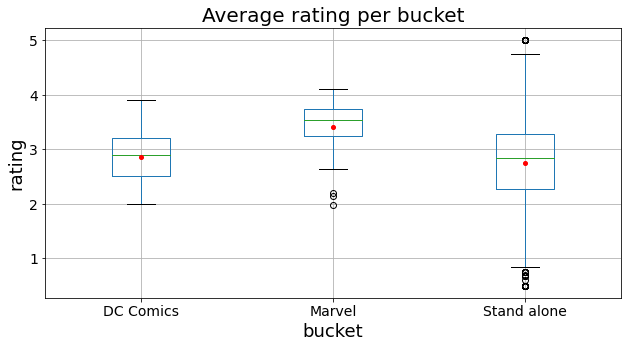

In [147]:
import matplotlib.pyplot as plt    
scifi_movies.boxplot(column = 'rating', 
                     by='bucket',
                     showmeans=True,
                     meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"4"},
                    figsize=(10,5))
title_boxplot = 'Average rating per bucket'
plt.title( title_boxplot, fontsize=20)
plt.suptitle('') # that's what you're after
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('bucket', fontsize=18)
plt.ylabel('rating', fontsize=18)
plt.show()

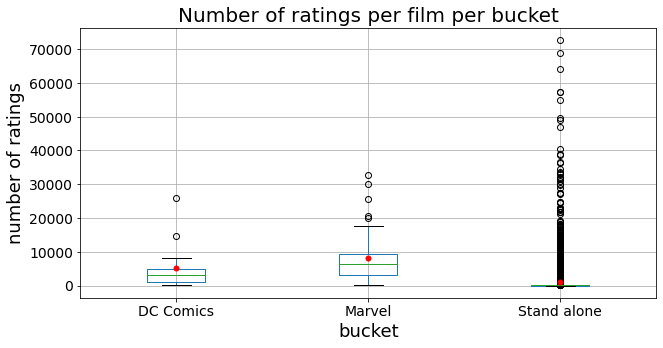

In [151]:
scifi_movies.boxplot(column = 'rating_count', 
                     by='bucket',
                    showmeans=True,
                     meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"5"},
                    figsize=(10,5))
title_boxplot = 'Number of ratings per film per bucket'
plt.title( title_boxplot, fontsize=20 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('bucket', fontsize=18)
plt.ylabel('number of ratings', fontsize=18)
plt.suptitle('') # that's what you're after
plt.show()

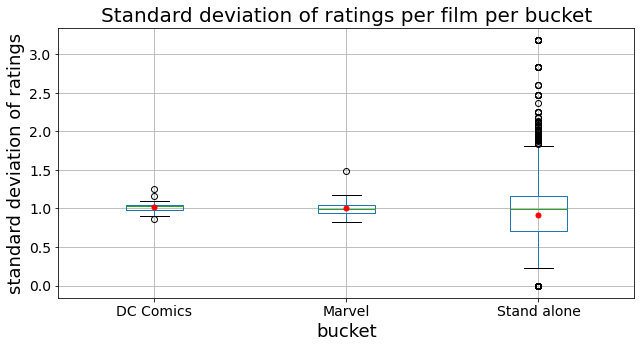

In [152]:
scifi_movies.boxplot(column = 'rating_stdev',
                     by='bucket',
                    showmeans=True,
                     meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"red",
                      "markersize":"5"},
                    figsize=(10,5)
                    )
title_boxplot = 'Standard deviation of ratings per film per bucket'
plt.title( title_boxplot , fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('bucket', fontsize=18)
plt.ylabel('standard deviation of ratings', fontsize=18)
plt.suptitle('') # that's what you're after
plt.show()

In [ ]:
#define marvel fan base in user ID and check if they tend to give higher ratings